<a href="https://colab.research.google.com/github/Anna172/ML/blob/master/%D0%B4%D0%B71_ndnf1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
#выводы не написаны, в конце грязно, датасет не скачан
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [140]:
data = pd.read_csv("HW1_var_11.csv", delimiter=';')
data.head()

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,11,1000011,Поступление зарплаты на счет,Другое,0,0.33,женский,0,0,высшее,вспомогательный персонал,>100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,1000031,Форма банка (без печати работодателя),Лечение,1,0.49,женский,0,0,среднее-специальное,вспомогательный персонал,>250,0.0,109.0,46.0,Торговля,ЗАО,холост / не замужем,3.0,2.0,2.0,1.0,0.0,0.089109,0.0,0.0,0.0,0.0,0.600000,3.0,2.0,92.0,5.0,2.0,1.0,17.0,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,1000051,2НДФЛ,Другое,1,0.59,женский,0,0,среднее-специальное,вспомогательный персонал,>250,0.0,47.0,47.0,Торговля,ООО,холост / не замужем,1.0,0.0,0.0,0.0,0.0,0.006369,1.0,0.0,0.0,0.0,0.555556,5.0,4.0,156.0,9.0,3.0,1.0,18.0,89.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,1000071,Поступление зарплаты на счет,Покупка автомобиля,1,0.36,мужской,0,0,высшее,специалист,>250,0.0,32.0,27.0,Информационные технологии,ООО,холост / не замужем,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,7.0,1.0,0.0,1.0,32.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,1000091,Свободная форма с печатью работодателя,Ремонт,1,0.53,женский,0,0,высшее,специалист,< 50,0.0,27.0,50.0,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сразу удалим из датасета переменные без описания и технического характера

In [141]:
data = data.drop("Номер варианта", axis = 1)
data = data.drop("ID", axis = 1)
data = data.drop("thirty_in_a_year", axis = 1)
data = data.drop("sixty_in_a_year", axis = 1)
data = data.drop("ninety_in_a_year", axis = 1)
data = data.drop("thirty_vintage", axis = 1)
data = data.drop("sixty_vintage", axis = 1)
data = data.drop("ninety_vintage", axis = 1)

data.shape

(10242, 36)

По каждой переменной набора данных рассчитаем: число уникальных значений (UNIQUE и PERCENT_UNIQUE), число нудевых значений (ZEROS и PERCENT_ZEROS), число пропущенных значений (NANS и PERCENT_NANS) и тип данных (DATA_TYPE). Результаты приведены в таблице ниже:

In [142]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt


,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
INCOME_BASE_TYPE,5,0.0488186,0,0,61,0.595587,object
CREDIT_PURPOSE,10,0.0976372,0,0,0,0,object
INSURANCE_FLAG,2,0.0195274,3975,38.8108,0,0,int64
DTI,61,0.595587,2,0.0195274,122,1.19117,float64
SEX,2,0.0195274,0,0,0,0,object
FULL_AGE_CHILD_NUMBER,6,0.0585823,6073,59.2951,0,0,int64
DEPENDANT_NUMBER,4,0.0390549,10214,99.7266,0,0,int64
EDUCATION,9,0.0878735,0,0,0,0,object
EMPL_TYPE,10,0.0976372,0,0,2,0.0195274,object
EMPL_SIZE,9,0.0878735,0,0,118,1.15212,object


Показатель количество кредитов (all_credits) не имеет нулевых значений, однако 63% наблюдений имеют пропущеные значеня по этому признаку. Также 63% наблюдений имеют пропущенные значения по таким признакам как num_AccountActive180, if_zaog и другим признакам, которые могут быть только у клиентов, имевших хоть 1 кредит. Соответственно, можно сделать вывод, что эти пропуски не случайны, а соответствуют клиентам, неимеющим кредитной истории. Далее, есть два варианта, как с ними поступить. Можно удалить их из выборки или же выделить их в отдельный сегмент, еще не имеющий кредитной истории. Я выбрала второй вариант, выделить в отдельный сегмент и продумывать взаимодействие с такими клиентами отдельно. На 3% меньше пропусков в наблюдениях по таким признакам как кол-во запросов в бюро кредитных историй за последние N дней (maxNdays), логично предположить, что эти три процента только пытаются получить свой первый кредит, и поним также нет кредитной истории. Таким образом, наблюдения, неимеющие кредитной истории мы можем выделить в отдельный сегмент, присвоив им вместо пропущенных значений большую по модулю отрицательную констану (-60), если это переменная численного типа и на значение *n.a.*, если это переменная типа объект. Такая замена выгодна с точки зрения последующего анализа по двум причинам: во-первых, потому что отрицательная константа не будет смешиваться с прочими - положительными - числами при анализе и построении моделей; во-вторых, большая по модулю константа будет легко отличима на гистограммах, что упрощает визуальный анализ. Было также решено не разделять клиентов не имеющих кредитной истории на тех, кто пытается взять креит и совсем еактивных клиентов, так как первых не так много, чтобы отелять их в отдельный сегмент.

In [143]:
nan_cols60 = dt[dt['PERCENT_NANS'] > 55].index
nan_cols60 = data[nan_cols60].select_dtypes(include=np.number).columns
data[nan_cols60] = data[nan_cols60].fillna(-60)

data.shape

(10242, 36)

In [144]:
object_type_columns = dt[ (dt['DATA_TYPE'] == 'object') & (dt['PERCENT_NANS'] > 55) ].index
object_type_columns = object_type_columns.tolist()
data[object_type_columns] = data[object_type_columns].fillna('*n.a.*')

data.shape

(10242, 36)

Также около 23% записей имеют пропущенные значения по таким переменным как BANKACCOUNT_FLAG, Period_at_work, age и EMPL_PROPERTY. Так как количество пропущенных значений по данным переменным одинаково, то можно предположить, что это не случайно. Поэтому было решено выделать эти записи, заменив пропущенные значения большой отрицательной константой (-20). Категориальную на *n.a.*.

In [145]:
nan_cols20 = dt[dt['PERCENT_NANS'] > 20].index
nan_cols20 = data[nan_cols20].select_dtypes(include=np.number).columns
data[nan_cols20] = data[nan_cols20].fillna(-20)

data.shape

(10242, 36)

In [146]:
object_type_columns = dt[ (dt['DATA_TYPE'] == 'object') & (dt['PERCENT_NANS'] > 20) ].index
object_type_columns = object_type_columns.tolist()
data[object_type_columns] = data[object_type_columns].fillna('*n.a.*')


data.shape

(10242, 36)

Итого у нас осталось 4 показателя процент пропуска по которым меньше 2. Те из них, которые являются категориальными было решено просто удалить. Не категориальные заменить средним значением.

In [147]:
meanDTI = data['DTI'].mean()
data['DTI'] = data['DTI'].fillna(meanDTI )

data.shape

(10242, 36)

In [148]:
smal_nan_coumns = dt[(dt['PERCENT_NANS'] < 2) & (dt['PERCENT_NANS'] > 0)] .index

md = pd.DataFrame(index=data.index)
for col in smal_nan_coumns.tolist():
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        md['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in md.columns if 'ismissing' in col]
md['num_missing'] = md[ismissing_cols].sum(axis=1)

ind_missing = md[md['num_missing'] > 0].index

data = data.drop(ind_missing, axis=0)
data.shape

(10122, 36)



Общий анализ уникальных и нулевых значений также показал, что переменная Dependent_number практически на 100% состоит из 0, а значит не несет дополнительной информации и ее можно удалить. 

В наборе данных есть категориаьные переменные, в основном представленные в виде объекта типа object. В дальнейшем для проведения сегментации их необходимо будет преобразовать при помощи OneHotEncoder.



In [149]:
data = data.drop("DEPENDANT_NUMBER", axis = 1)
dt = dt.drop("DEPENDANT_NUMBER", axis = 0)
data.shape

(10122, 35)

In [150]:
# Итого после преобразований получим
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
INCOME_BASE_TYPE,4,0.0395179,0,0,0,0,object
CREDIT_PURPOSE,10,0.0987947,0,0,0,0,object
INSURANCE_FLAG,2,0.0197589,3865,38.1842,0,0,int64
DTI,61,0.602648,2,0.0197589,0,0,float64
SEX,2,0.0197589,0,0,0,0,object
FULL_AGE_CHILD_NUMBER,6,0.0592768,6004,59.3163,0,0,int64
EDUCATION,9,0.0889152,0,0,0,0,object
EMPL_TYPE,9,0.0889152,0,0,0,0,object
EMPL_SIZE,8,0.0790358,0,0,0,0,object
BANKACCOUNT_FLAG,5,0.0493974,6242,61.6677,0,0,float64


In [151]:
# создадим списки категориальных переменных, чтобы потом исследовать распределение набора данных по ним
# создадим список переменых типа object, чтоы потом кодировать из в числовые переменные, это нужно для построения моели на этих данных
categorical_columns = dt[dt['UNIQUE'] < 14].index
notcategorical_columns = dt[dt['UNIQUE'] > 13].index
categorical_columns = categorical_columns.tolist()
notcategorical_columns = notcategorical_columns.tolist()
object_type_columns = dt[dt['DATA_TYPE'] == 'object'].index
object_type_columns = object_type_columns.tolist()

print(len(object_type_columns), len(categorical_columns), len(notcategorical_columns))


9 19 16


Проведем анализ описательных статистик по численным переменным набора данных:

In [152]:
columns = ["COUNT", 'MEAN', 'STD', 'MIN', '25%', '50%', '75%', 'MAX']
numeric_data = data.select_dtypes(include=np.number)
dt = pd.DataFrame(index=numeric_data.columns, columns=columns)

for col in numeric_data.columns:
  dt.loc[col,"COUNT"] = numeric_data[numeric_data[col] >= 0][col].count()
  dt.loc[col,"MEAN"] = numeric_data[numeric_data[col] >= 0][col].mean()
  dt.loc[col,"STD"] = numeric_data[numeric_data[col] >= 0][col].std()
  dt.loc[col,"MIN"] = numeric_data[numeric_data[col] >= 0][col].min()
  dt.loc[col,"25%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.25)
  dt.loc[col,"50%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.50)
  dt.loc[col,"75%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.75)
  dt.loc[col,"MAX"] = numeric_data[numeric_data[col] >= 0][col].max()

dt

,COUNT,MEAN,STD,MIN,25%,50%,75%,MAX
INSURANCE_FLAG,10122,0.618158,0.485862,0,0,1,1,1
DTI,10122,0.387964,0.136864,0,0.28,0.4,0.49,0.59
FULL_AGE_CHILD_NUMBER,10122,0.55987,0.775337,0,0,0,1,5
BANKACCOUNT_FLAG,7818,0.367613,0.855229,0,0,0,0,4
Period_at_work,7818,65.9881,67.4058,4,20,44,87,502
age,7818,36.3519,8.7302,23,29,35,43,63
max90days,4016,1.67156,1.89827,0,1,1,2,31
max60days,4016,1.20319,1.54518,0,0,1,2,14
max30days,4016,0.89492,1.30099,0,0,1,1,12
max21days,4016,0.679781,1.1385,0,0,0,1,12


При анализе описательных статистик было выявлено, что некоторые пременные, например, Period_at_work, sum_of_paym_months и max_MnthAfterLoan имеют выбросы. Так как максимальное значение в несколько раз отличается от 75% квантиле. Далее будет проведен более подробный анализ выбросов.

По численным переменным была построена корреляционная карта:

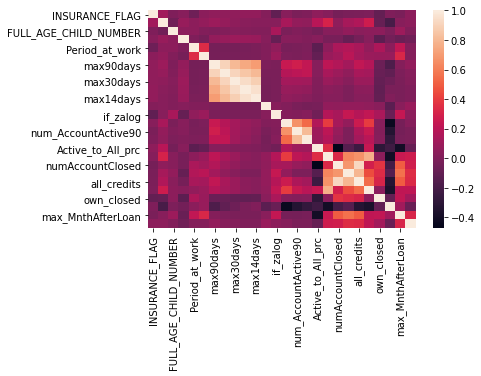

In [153]:
sns.heatmap(numeric_data[numeric_data[col] >= 0].corr())

Карта показывает, что в основном, между переменными наблюдается низкая корреляция, а потому лиейно-регрессионный анализ в данном случае может быть неуместен.

На рисунке ниже приведены гистограммы по численным переменным (с опущенными пропусками) набора данных:

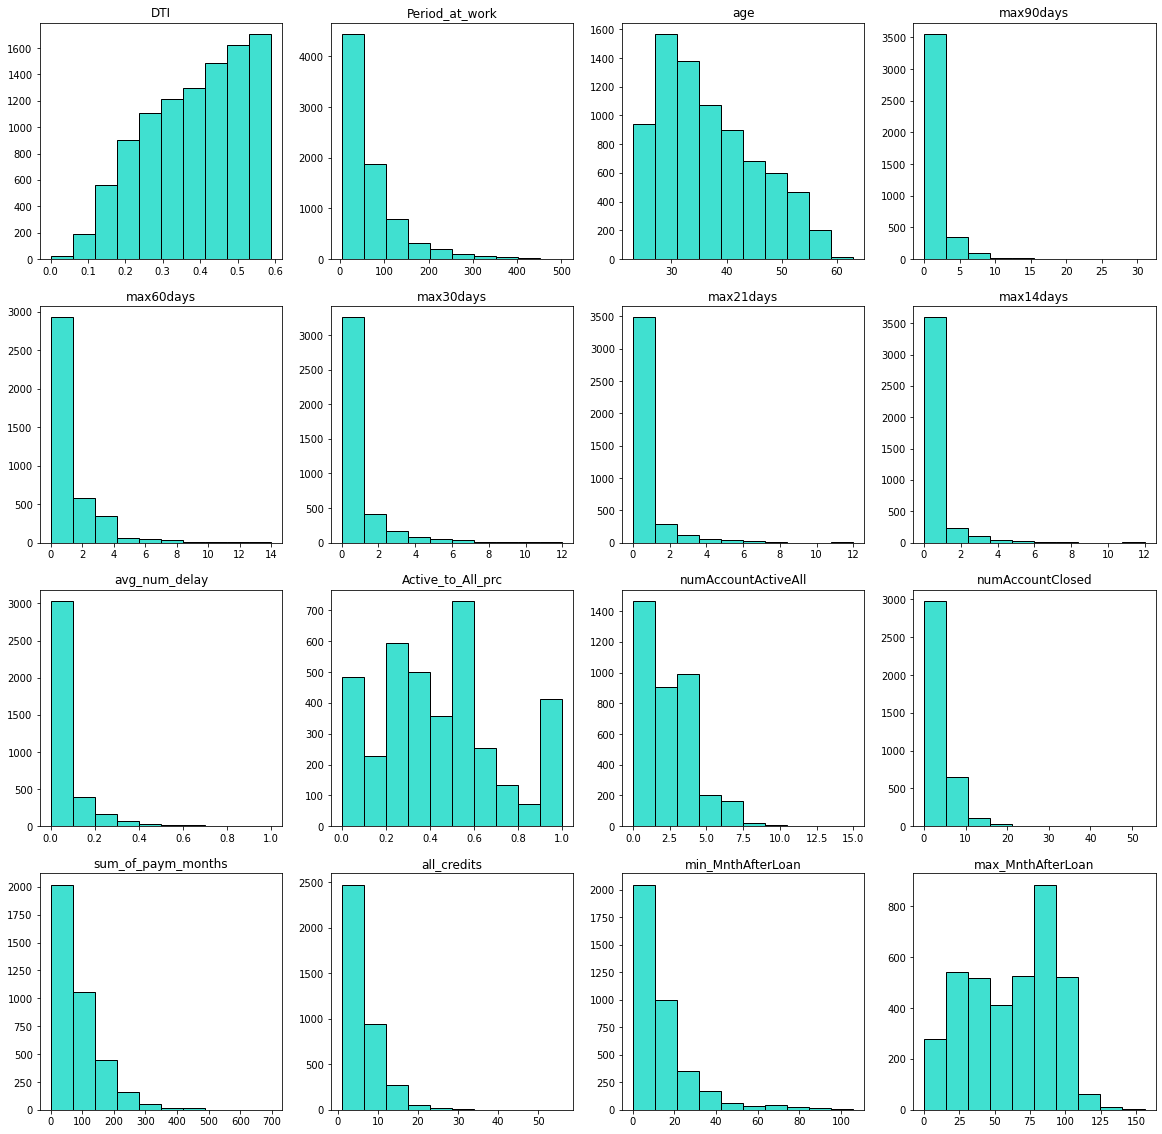

In [154]:
r = 4
c = 4
numeric_data = data[notcategorical_columns].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0

for col in numeric_data.columns:
    if (i < r) & (j < c): 
      ax[i, j].hist(numeric_data[numeric_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      ax[i, j].hist(numeric_data[numeric_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    else:
      print('ERROR')  
 
plt.show()

Из визуального анализа гистограмм можно заметить, что в выборке присутствуют, в основном, молодое поколение (до 40 лет) с небольшим количеством дней работы(до 100 дней), и отсутствуют пожилые люди (после 60 лет), а также люди, работающие более года (AGE и Period_at_work). Также в выборке достаточно много индивидов с высоким отношением долга к доходам (DTI). Велико число человек с низким числом активных кредитов и банковских счетов (all_credits и numAccountActiveAll), а также недавно взявших свой первый кредит (max_MnthAfterLoan), совершивших небольшое число платежей за послений месяц (sum_of_paym_months). Это наводит на мысль, что в данных должны проявиться как минимум следующие кластеры: молодые люди, взявшие один кредит и имеющие низкие доход, так, что соотношение долга к доходам значительно и люди среднего возраста, имеющие активную кредитную историю.

Теперь посмотрим на категориальные переменные. Проверим на наличие некорректных ззнаков. Так как переменных для проверки немного, уникальных значений в них тоже немного, поэтому можно провести проверку на наличие некорректных знаков путем простого просмотра уникальных значений.

In [155]:
for col in object_type_columns:
  print(col, data[col].unique().tolist())

INCOME_BASE_TYPE ['Поступление зарплаты на счет', 'Форма банка (без печати работодателя)', '2НДФЛ', 'Свободная форма с печатью работодателя']
CREDIT_PURPOSE ['Другое', 'Лечение', 'Покупка автомобиля', 'Ремонт', 'Покупка недвижимости/ строительство', 'Покупка земли', 'Покупка мебели', 'Отпуск', 'Покупка бытовой техники', 'Обучение']
SEX ['женский', 'мужской']
EDUCATION ['высшее', 'среднее-специальное', 'незаконченное высшее', 'Высшее/Второе высшее/Ученая степень', 'второе высшее', 'среднее', '*n.a.*', 'ученая степень', 'Неполное среднее']
EMPL_TYPE ['вспомогательный персонал', 'специалист', 'менеджер среднего звена', 'менеджер высшего звена', 'рабочий', 'менеджер по продажам', 'торговый представитель', 'другое', 'страховой агент']
EMPL_SIZE ['>100', '>250', '< 50', '>=50', '>=200', '>=150', '>=100', '*n.a.*']
EMPL_PROPERTY ['*n.a.*', 'Торговля', 'Информационные технологии', 'Производство', 'Строительство', 'Транспорт', 'Государственная служба', 'Другое', 'Финансы', 'Сельское и лесное хо

In [156]:
print(data[data['EDUCATION'] == 'Высшее/Второе высшее/Ученая степень'].shape[0])

1538


EDUCATION имеет значение Высшее/Второе высшее/Ученая степень, которое дублирует три другие значения. Это странно, но такое значение принимает достаточно большое количество наблюдений, поэтому удалять их нецелесообразно. Поставить всем им вместо этого значения наиболее часто встречающееся из высшего, второго высшего или ученой степени будет, наверное, не совсем правильно, поэтому просто оставим это как есть. В остальном некорректных значений не было обнаружено.

In [166]:
# чтобы посмотреть распределение данных по категориальным переменным, создадим набор категориальных данных, где закодируем все переменные типа объект в числовые переменные

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cd = pd.DataFrame( data[categorical_columns])

for col in object_type_columns:
  cd[col] = labelencoder.fit_transform(cd[col].astype(str))

cd.tail()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,SEX,FULL_AGE_CHILD_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_not_cc,own_closed,dlq_exist
10237,2,8,0,0,1,4,4,2,-20.0,0,0,0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0
10238,0,8,1,0,1,7,0,3,3.0,4,0,0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0
10239,3,9,1,1,0,4,4,3,0.0,9,0,0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0
10240,3,9,1,1,1,6,0,4,-20.0,0,0,0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0
10241,0,9,1,1,0,4,4,3,0.0,8,6,3,1.0,0.0,0.0,0.0,1.0,2.0,1.0


Теперь рассмотрим распределение данных по категориальным переменным (c опущенными пропущенными значениями).

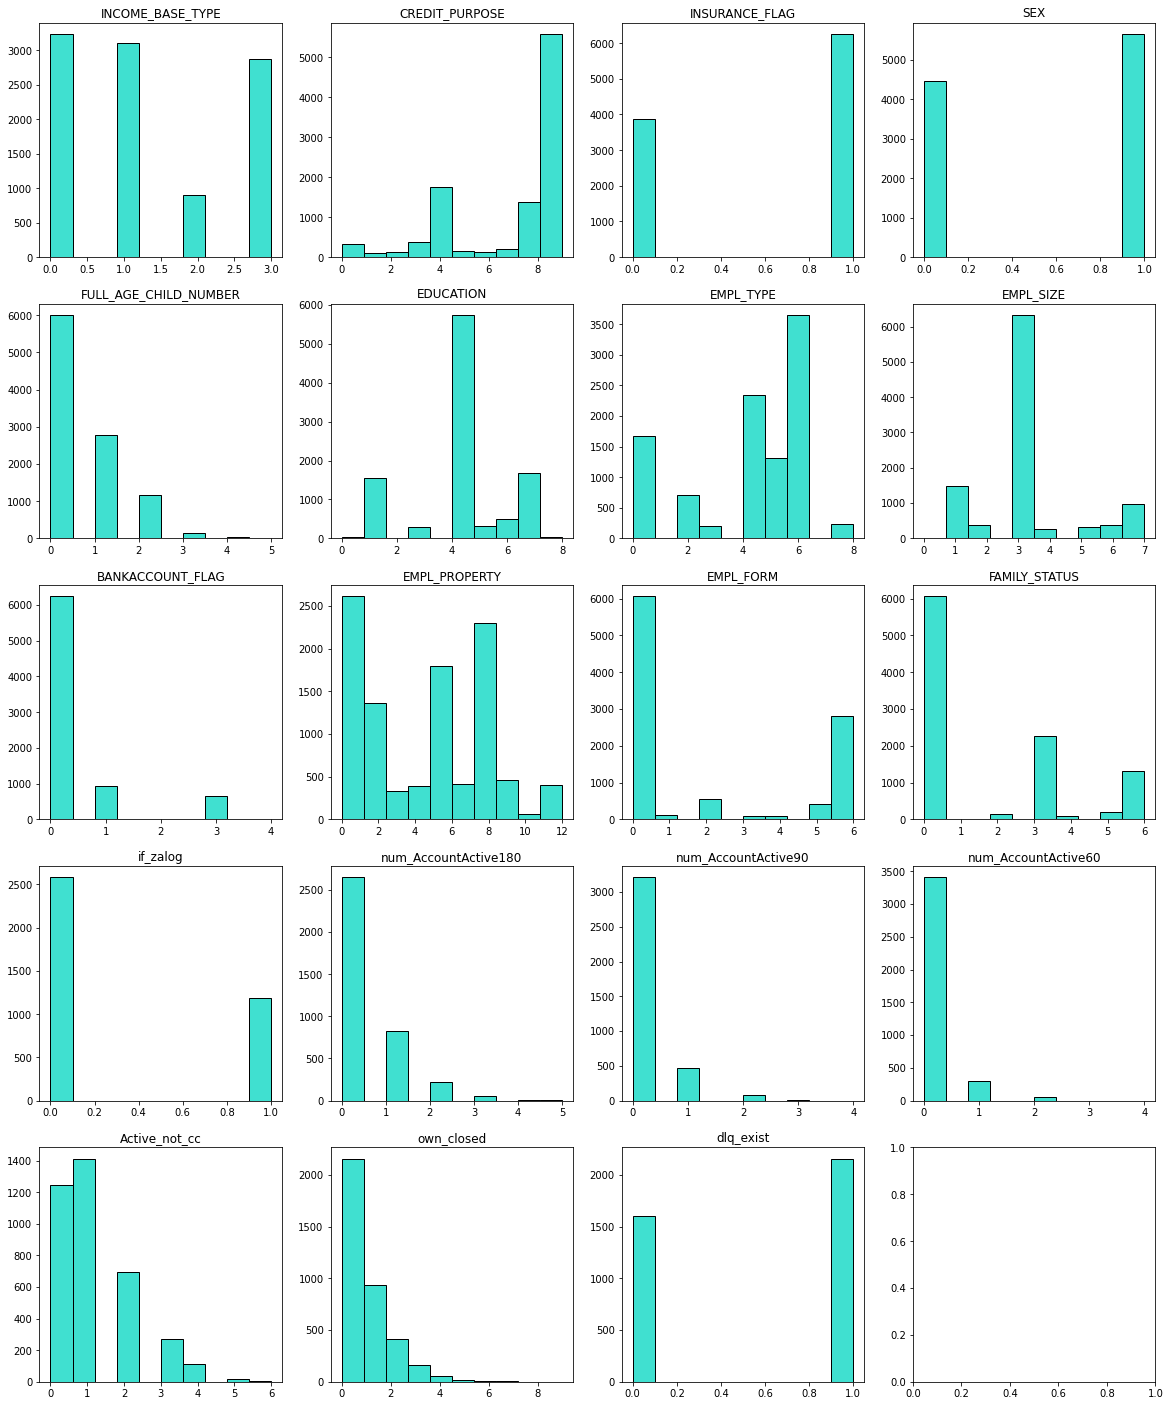

In [170]:
r = 5
c = 4
categorical_data = cd[categorical_columns].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0

for col in categorical_data.columns:
    if (i < r) & (j < c): 
      ax[i, j].hist(categorical_data[categorical_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      ax[i, j].hist(categorical_data[categorical_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    else:
      print('ERROR')  
 
plt.show()

Можно отметить, что соотношение категориальных переменных, в основном, непропорционально, а потому они не являются подходящим для сегментации признаками. Переменные INCOME_BASE_TYPE, SEX и dlq_exist распределены пропорционально и не имеют выбросов, что сохраняет принцип онородности-разнородности, так как нет "скошенности" в одну сторону категории, и категории четко различимы в данных, поэтому они будут хорошими признаками для сегментации.

Теперь проведем анализ выбросов в числовых наборах данных. Для этого построим боксплоты.

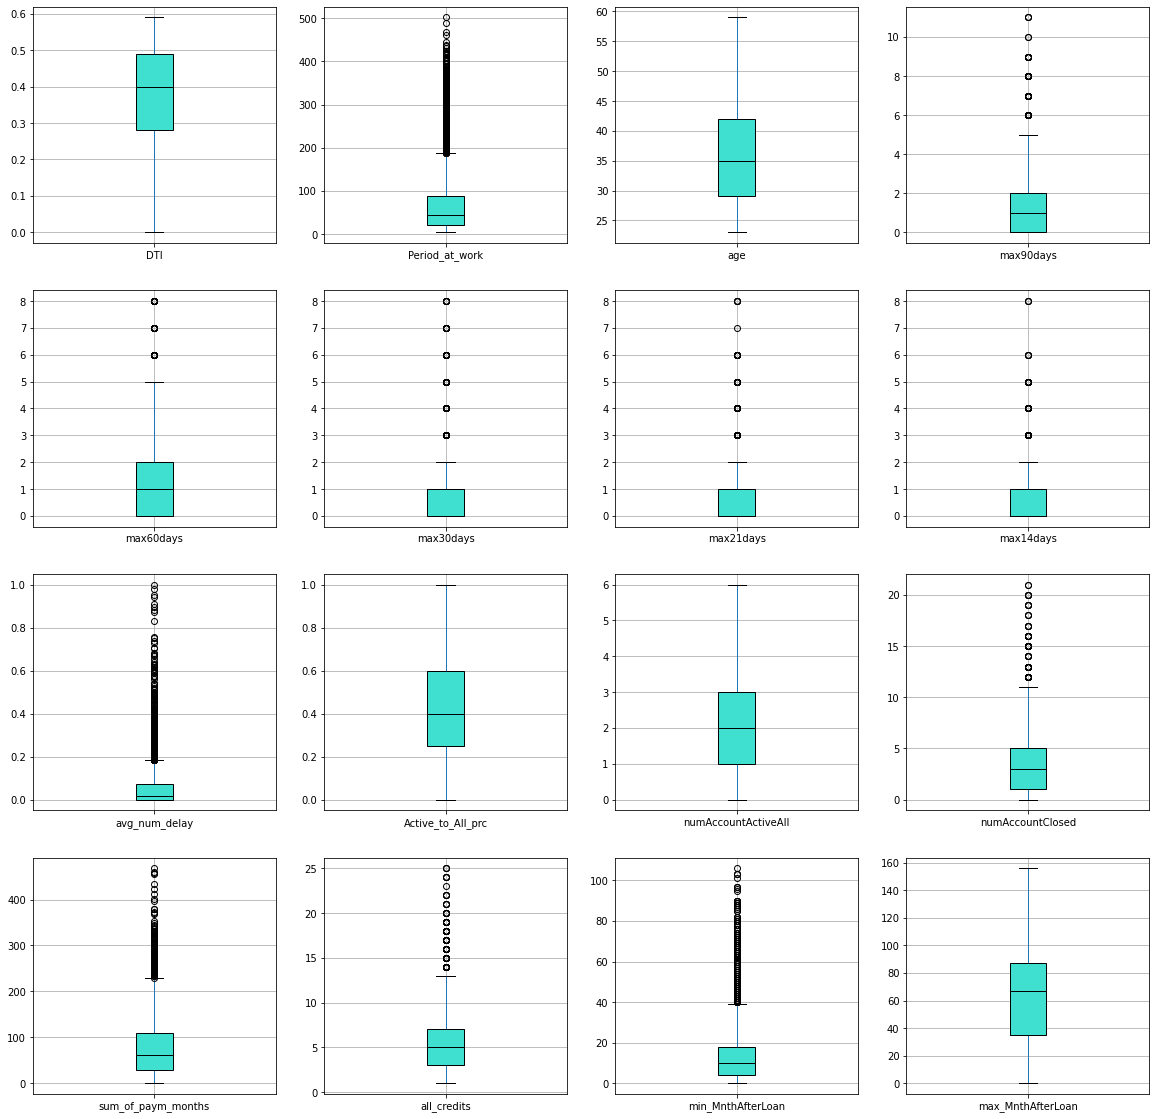

In [ ]:
r = 4
c = 4
numeric_data = data[notcategorical_columns].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (r*5, c*5))

i = 0
j = 0

for col in numeric_data.columns:
    if (i < r) & (j < c):
      numeric_data[numeric_data[col] >= 0].boxplot(column=col, ax=ax[i, j], patch_artist=True, 
                           boxprops=dict(facecolor='turquoise', color='black'),
                           medianprops=dict(color='black'))
                           
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      numeric_data[numeric_data[col] >= 0].boxplot(column=col, ax=ax[i, j], patch_artist=True, 
                           boxprops=dict(facecolor='turquoise', color='black'),
                           medianprops=dict(color='black'))
      j += 1
    else:
      print('ERROR')  
 
plt.show()

Переменные DTI, age, Active_to_All_prc и max_MnthAfterLoan не имеют выбрасов, поэтому их хорошо использовать в модели. Такие поля как Period_at_work, avg_num_delay, sum_of_paym_months min_MonthAfterLoan имеют очень большое количество выбросов. Довольно много выбросов имеют также max90days, numAccountClosed, all_credits. Удалять выбросы нецелесообразно, так как их много, а набор данных небольшой. Можено удалить выбросы точечно, чтобы стало чуть лучше, но обьем данных уменьшился незаметно.

In [ ]:
data.shape

(10122, 35)

In [ ]:
data = data[data['max90days'] < 12]
data = data[data['age'] < 62]
data = data[data['max21days'] < 9]
data = data[data['max30days'] < 9]
data = data[data['max60days'] < 9]
data = data[data['numAccountClosed'] < 23]
data = data[data['all_credits'] < 40]
data = data[data['sum_of_paym_months'] < 500]
data = data[data['numAccountActiveAll'] < 7]
data.shape

(10002, 35)

ДАЛЕЕ МОЖНО ПРЕОБРАЗОВАТЬ КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)

for col in object_type_columns:
  data[data[col].unique().tolist()] = one_hot_encoder.fit_transform(data[col].values.reshape(-1,1))

data.head()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,Поступление зарплаты на счет,Форма банка (без печати работодателя),2НДФЛ,Свободная форма с печатью работодателя,Другое,...,вспомогательный персонал,специалист,менеджер среднего звена,менеджер высшего звена,рабочий,менеджер по продажам,торговый представитель,другое,страховой агент,>100,>250,< 50,>=50,>=200,>=150,>=100,нет данных,Торговля,Информационные технологии,Производство,Строительство,Транспорт,Государственная служба,Финансы,Сельское и лесное хозяйство,Наука,Туризм,Юридические услуги,ЗАО,ООО,ОАО,Индивидуальный предприниматель,Государственное предприятие,Иная форма,холост / не замужем,женат / замужем,разведен / разведена,гражданский брак,повторный брак,вдовец / вдова
0,Поступление зарплаты на счет,Другое,0,0.33,женский,0,высшее,вспомогательный персонал,>100,-20.0,-20.0,-20.0,нет данных,нет данных,нет данных,-60.0,-60.0,-60.0,-60.0,-60.0,-60.000000,-60.0,-60.0,-60.0,-60.0,-60.000000,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Форма банка (без печати работодателя),Лечение,1,0.49,женский,0,среднее-специальное,вспомогательный персонал,>250,0.0,109.0,46.0,Торговля,ЗАО,холост / не замужем,3.0,2.0,2.0,1.0,0.0,0.089109,0.0,0.0,0.0,0.0,0.600000,3.0,2.0,92.0,5.0,2.0,1.0,17.0,43.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2НДФЛ,Другое,1,0.59,женский,0,среднее-специальное,вспомогательный персонал,>250,0.0,47.0,47.0,Торговля,ООО,холост / не замужем,1.0,0.0,0.0,0.0,0.0,0.006369,1.0,0.0,0.0,0.0,0.555556,5.0,4.0,156.0,9.0,3.0,1.0,18.0,89.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Поступление зарплаты на счет,Покупка автомобиля,1,0.36,мужской,0,высшее,специалист,>250,0.0,32.0,27.0,Информационные технологии,ООО,холост / не замужем,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,7.0,1.0,0.0,1.0,32.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Свободная форма с печатью работодателя,Ремонт,1,0.53,женский,0,высшее,специалист,< 50,0.0,27.0,50.0,Производство,нет данных,нет данных,-60.0,-60.0,-60.0,-60.0,-60.0,-60.000000,-60.0,-60.0,-60.0,-60.0,-60.000000,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,-60.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
data.shape

(10002, 100)

In [ ]:
data = data.drop(object_type_columns, axis=1)

In [ ]:
# на этом все, выводы не написаны, в конце грязно, датасет не скачан
data.shape


(3743, 78)

нужно еще пустые значения проверить, чтобы не было таких колонок

ВЫВОДЫ ПО ПЕРВОЙ ЧАСТИ РАБОТЫ:



*   В данных достаточно много пропущенных значений, выбрасывать их нецелесообразно. Пропущенные значения заменяются константой -37.

*   Переменные MIN_MNTHAFTERLOAN и MAX_MNTHAFTERLOAN имеют недопустимые значения, которые было решено удалить из выборки.

*   Переменные слабо коррелируют между собой, линейно-регрессионный анализ неуместен.

*   Для кодировки пропущенных значений в данных также присутствует строковая метка '*n.a*'.


С учетом всех корректировок была составлена финальная витрина.



In [ ]:
data.head()

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,Форма банка (без печати работодателя),2НДФЛ,Поступление зарплаты на счет,Свободная форма с печатью работодателя,Лечение,Другое,Покупка автомобиля,Покупка недвижимости/ строительство,Ремонт,Покупка земли,Отпуск,Покупка мебели,Покупка бытовой техники,Обучение,женский,мужской,среднее-специальное,высшее,Высшее/Второе высшее/Ученая степень,незаконченное высшее,второе высшее,среднее,*n.a.*,ученая степень,Неполное среднее,вспомогательный персонал,специалист,менеджер среднего звена,рабочий,менеджер высшего звена,торговый представитель,менеджер по продажам,страховой агент,другое,>250,< 50,Торговля,Информационные технологии,Сельское и лесное хозяйство,Юридические услуги,ЗАО,ООО,ОАО,Индивидуальный предприниматель,Государственное предприятие,Иная форма,холост / не замужем,женат / замужем,разведен / разведена,гражданский брак,повторный брак,вдовец / вдова
1,1,0.49,0,0.0,109.0,46.0,3.0,2.0,2.0,1.0,0.0,0.089109,0.0,0.0,0.0,0.0,0.600000,3.0,2.0,92.0,5.0,2.0,1.0,17.0,43.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0.59,0,0.0,47.0,47.0,1.0,0.0,0.0,0.0,0.0,0.006369,1.0,0.0,0.0,0.0,0.555556,5.0,4.0,156.0,9.0,3.0,1.0,18.0,89.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.36,0,0.0,32.0,27.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,7.0,1.0,0.0,1.0,32.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13,1,0.50,0,0.0,6.0,53.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.0,0.0,0.500000,3.0,3.0,46.0,6.0,2.0,3.0,3.0,28.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,0,0.47,1,0.0,53.0,26.0,3.0,2.0,2.0,2.0,1.0,0.023622,1.0,0.0,0.0,0.0,0.375000,3.0,5.0,124.0,8.0,2.0,0.0,8.0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#data.to_csv("Anna_Trushnikova_BBI172_HW1_0.csv", index=False)

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)
cd = pd.DataFrame(index=data.index)
cd[data['EDUCATION'].unique().tolist()] = one_hot_encoder.fit_transform(data['EDUCATION'].values.reshape(-1,1))
cd.head()

In [ ]:
a = data[data['EDUCATION'].isnull() != 1 ]
a['EDUCATION'].unique().tolist()

['высшее',
 'среднее-специальное',
 'незаконченное высшее',
 'Высшее/Второе высшее/Ученая степень',
 'второе высшее',
 'среднее',
 '*n.a.*',
 'ученая степень',
 'Неполное среднее']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
cd = pd.DataFrame(index=data.index)
cd[['женский','мужской']] = one_hot_encoder.fit_transform(data['SEX'].values.reshape(-1,1))
cd[data['EDUCATION'].unique().tolist()] = one_hot_encoder.fit_transform(data['EDUCATION'].values.reshape(-1,1))
cd.head()



,женский,мужской,высшее,среднее-специальное,незаконченное высшее,Высшее/Второе высшее/Ученая степень,второе высшее,среднее,*n.a.*,ученая степень,Неполное среднее
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data.shape

(3762, 36)